# YOLO Object Detection, Instance Segmentation, Image Classification, Pose Estimation, Oriented Bounding Boxes Object Detection, Face detection
[Kaggle](https://www.kaggle.com/keshabkkumar) Check out my Kaggle for similar projects.

# 1. What is YOLO?
YOLO (You Only Look Once) is a state-of-the-art real-time object detection algorithm widely used in computer vision tasks. It processes an entire image in a single forward pass through a neural network, making it faster and efficient compared to other detection models like R-CNN or SSD.
Check out the official Docs of Ultralytics to learn more about YOLO and YOLO11 from here [Ultralytics Docs](https://docs.ultralytics.com/) 

**Ultralytics YOLO11** is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLO11 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.

**YOLO11** is built on cutting-edge advancements in deep learning and computer vision, offering unparalleled performance in terms of speed and accuracy. Its streamlined design makes it suitable for various applications and easily adaptable to different hardware platforms, from edge devices to cloud APIs.

# 2. Dependencies

In [11]:
%pip install ultralytics opencv-python pytube
from ultralytics import YOLO

# 3. Object Detection
Object detection identifies and localizes objects within an image, placing bounding boxes around each detected object. It provides both the class of each object (e.g., "dog" or "car") and its location. Models like YOLO, SSD, and Faster R-CNN are popular for this task. Applications include facial recognition, autonomous driving, and surveillance.
Object detection is a task that involves identifying the location and class of objects in an image or video stream.

The output of an object detector is a set of bounding boxes that enclose the objects in the image, along with class labels and confidence scores for each box. Object detection is a good choice when you need to identify objects of interest in a scene, but don't need to know exactly where the object is or its exact shape.

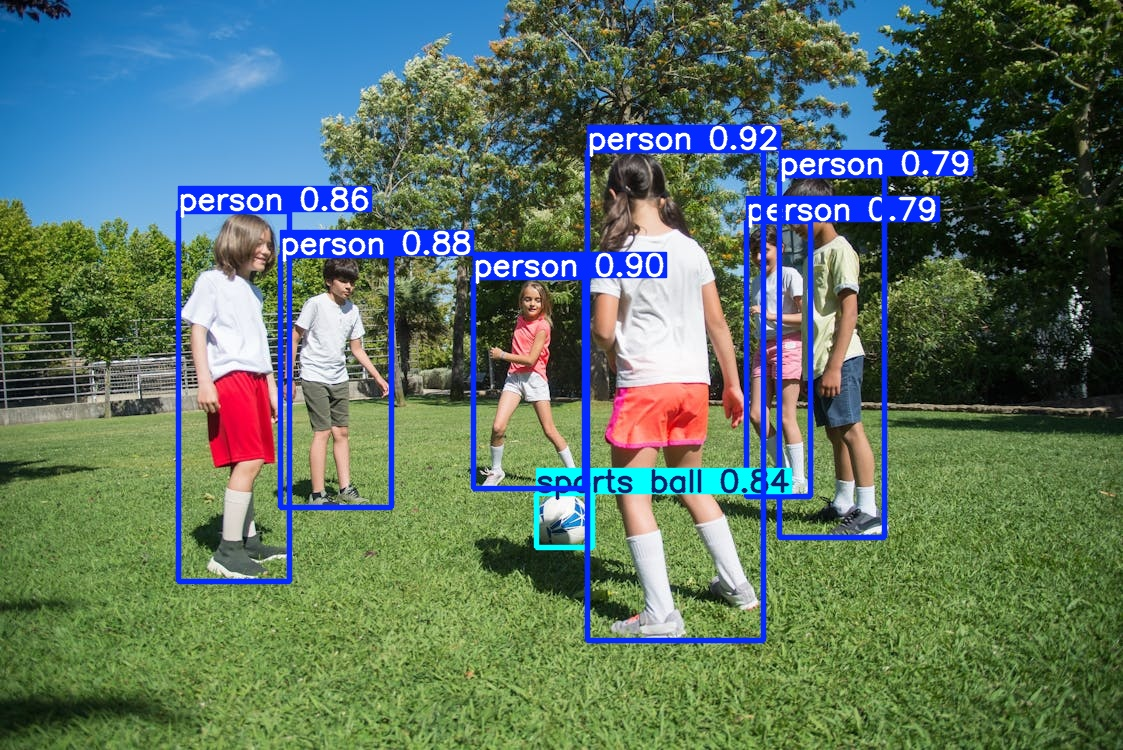

Object Detection models are pretrained on the [COCO](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml) dataset, , which include 80 pre-trained classes.

## Load Object Detection Model

In [2]:
model = YOLO("yolo11n.pt")

## Object detection in images

In [4]:
result = model("Detect.jpg", save = True)
result[0].show()


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\Detect.jpg: 384x640 7 persons, 1 car, 3 buss, 1 truck, 1 traffic light, 177.9ms
Speed: 12.6ms preprocess, 177.9ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


## Object detection On Video

In [5]:
result = model("vid.mp4", save = True)
result[0].show()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 10 persons, 3 teddy bears, 94.5ms
video 1/1 (frame 2/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 11 persons, 1 cow, 1 teddy bear, 92.8ms
video 1/1 (frame 3/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 9 persons, 2 teddy bears, 100.3ms
video 1/1 (frame 4/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 38

## Realtime object detection
We can also use object detection on any video and live stream through their link.
Also, We can apply the realtime object detection model in a cctv .

In [2]:
from ultralytics import YOLO
import cv2
import os
import datetime

# Load the YOLO model
model = YOLO("YOLO11n.pt")
cap = cv2.VideoCapture(0) 
save_directory = "Detected_Video"
os.makedirs(save_directory, exist_ok=True)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) if cap.get(cv2.CAP_PROP_FPS) > 0 else 30  


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_filename = f"annotated_video_{timestamp}.mp4"
video_path = os.path.join(save_directory, video_filename)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

print(f"Recording video to: {video_path}")
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from the webcam.")
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLO Real-Time Detection", annotated_frame)
    # press key "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Webcam feed stopped and resources released.")


Recording video to: Detected_Video\annotated_video_20241204_221157.mp4
Press 'q' to stop the webcam feed.

0: 480x640 1 person, 1 bottle, 134.2ms
Speed: 7.6ms preprocess, 134.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 124.0ms
Speed: 4.0ms preprocess, 124.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 121.1ms
Speed: 5.5ms preprocess, 121.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 124.7ms
Speed: 3.2ms preprocess, 124.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 134.6ms
Speed: 2.1ms preprocess, 134.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 137.7ms
Speed: 16.3ms preprocess, 137.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 137.1ms
Speed: 4.0ms preprocess, 

Object Detection on Youtube video by using pytube

In [12]:
from ultralytics import YOLO
# Load the YOLO model
model = YOLO("YOLO11n.pt")
result = model("https://youtu.be/GHpiJbQiaUU?si=2sa42Hz43BiVNlQk", save = True)
result[0].show()


1/1: https://youtu.be/GHpiJbQiaUU?si=2sa42Hz43BiVNlQk... Success  (3369 frames of shape 1920x1080 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x640 2 persons, 1 tie, 747.7ms
0: 384x640 3 persons, 1 tie, 1024.4ms
0: 384x640 2 persons, 2 ties, 605.5ms
0: 384x640 7 persons, 856.2ms
0: 384x640 7 persons, 575.2ms
0: 384x640 6 persons, 592.4ms
0: 384x640 4 persons, 914.6ms
0: 384x640 5 persons, 530.0ms
0: 384x640 (no detections), 864.2ms
0: 384x640 1 person, 245.4ms
0: 384x640 1 pers

# 4. Instance Segmentation
Instance segmentation goes a step further than object detection and involves identifying individual objects in an image and segmenting them from the rest of the image.

The output of an instance segmentation model is a set of masks or contours that outline each object in the image, along with class labels and confidence scores for each object. Instance segmentation is useful when you need to know not only where objects are in an image, but also what their exact shape is.

**Segmentation** divides an image into regions or pixels corresponding to different objects or parts of objects.
YOLO11 pretrained Segment models are pretrained on the [COCO](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml) dataset,which include 80 pre-trained classes.

## Load Segmentation Model

In [5]:
model = YOLO("yolo11n-seg.pt")

## Segmentation on Image

In [6]:
result = model("test.jpeg", save = True)
result[0].show()


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\test.jpeg: 448x640 6 persons, 1 sports ball, 205.5ms
Speed: 4.6ms preprocess, 205.5ms inference, 17.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict


## Segmentation in Video

In [7]:
result = model("vid.mp4", save = True)
result[0].show()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 11 persons, 1 dog, 176.5ms
video 1/1 (frame 2/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 10 persons, 2 dogs, 113.0ms
video 1/1 (frame 3/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 9 persons, 1 bicycle, 3 dogs, 134.4ms
video 1/1 (frame 4/1164) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid.mp4: 384x640 9 persons

## Realtime Instance Segmentation
We can also use segmentation for streaming video

In [10]:
from ultralytics import YOLO
import cv2
import os
import datetime

# Load the YOLO model
model = YOLO("YOLO11n-seg.pt")
cap = cv2.VideoCapture(0) 
save_directory = "Segmented_Video"
os.makedirs(save_directory, exist_ok=True)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) if cap.get(cv2.CAP_PROP_FPS) > 0 else 30  


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_filename = f"segmented_video_{timestamp}.mp4"
video_path = os.path.join(save_directory, video_filename)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

print(f"Recording video to: {video_path}")
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from the webcam.")
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLO Real-Time instance segmentation", annotated_frame)
    # press key "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Webcam feed stopped and resources released.")


Recording video to: Segmented_Video\segmented_video_20241204_224642.mp4
Press 'q' to stop the webcam feed.

0: 480x640 1 person, 1 bottle, 402.6ms
Speed: 16.7ms preprocess, 402.6ms inference, 11.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 201.7ms
Speed: 4.2ms preprocess, 201.7ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 186.1ms
Speed: 4.0ms preprocess, 186.1ms inference, 6.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 178.7ms
Speed: 4.0ms preprocess, 178.7ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 183.1ms
Speed: 3.0ms preprocess, 183.1ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 199.1ms
Speed: 4.0ms preprocess, 199.1ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 bottle, 187.1ms
Speed: 6.0ms preprocess

# 5. Pose Estimation
Pose estimation detects the orientation and positioning of objects, especially human bodies, by locating key points (like joints). This technique is valuable in motion tracking, fitness apps, animation, and augmented reality. The model estimates the spatial configuration of the body, often using deep learning to track movements over time.

Pose estimation is a task that involves identifying the location of specific points in an image, usually referred to as keypoints. The keypoints can represent various parts of the object such as joints, landmarks, or other distinctive features. The locations of the keypoints are usually represented as a set of 2D [x, y] or 3D [x, y, visible] coordinates.

The output of a pose estimation model is a set of points that represent the keypoints on an object in the image, usually along with the confidence scores for each point. Pose estimation is a good choice when you need to identify specific parts of an object in a scene, and their location in relation to each other.

YOLO11 pretrained Pose models are pretrained on the [COCO](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml) dataset, which include 1 pre-trained class, person.

## Load Pose Estimation Model

In [18]:
model = YOLO("yolo11n-pose.pt")

## Pose Estimation on Image

In [15]:
result = model("pose sample.jpeg",save = True)
result[0].show()


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\pose sample.jpeg: 544x640 3 persons, 776.1ms
Speed: 21.7ms preprocess, 776.1ms inference, 29.2ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs\pose\predict2


## Pose Estimation on Video

In [16]:
result = model("https://youtube.com/shorts/EQRmNfjZSds?si=3mXaepLT_6zCBw07", save = True)
result[0].show()


1/1: https://youtube.com/shorts/EQRmNfjZSds?si=3mXaepLT_6zCBw07... Success  (533 frames of shape 1080x1920 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 640x384 1 person, 1477.3ms
0: 640x384 1 person, 1216.5ms
0: 640x384 1 person, 1027.6ms
0: 640x384 2 persons, 866.9ms
0: 640x384 1 person, 837.9ms
0: 640x384 1 person, 973.0ms
0: 640x384 2 persons, 988.0ms
0: 640x384 2 persons, 767.0ms
0: 640x384 2 persons, 650.8ms
0: 640x384 2 persons, 575.3ms
0: 640x384 2 persons, 646.8ms
0: 640x3

## Realtime Pose Estimation



In [19]:
from ultralytics import YOLO
import cv2
import os
import datetime
cap = cv2.VideoCapture(0) 
save_directory = "Pose_Video"
os.makedirs(save_directory, exist_ok=True)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) if cap.get(cv2.CAP_PROP_FPS) > 0 else 30  


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_filename = f"segmented_video_{timestamp}.mp4"
video_path = os.path.join(save_directory, video_filename)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

print(f"Recording video to: {video_path}")
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from the webcam.")
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLO Real-Time Pose Estimation", annotated_frame)
    # press key "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Webcam feed stopped and resources released.")


Recording video to: Pose_Video\segmented_video_20241204_233325.mp4
Press 'q' to stop the webcam feed.

0: 480x640 1 person, 678.9ms
Speed: 17.3ms preprocess, 678.9ms inference, 7.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 587.0ms
Speed: 8.6ms preprocess, 587.0ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 601.8ms
Speed: 6.8ms preprocess, 601.8ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 531.5ms
Speed: 10.6ms preprocess, 531.5ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 495.8ms
Speed: 12.7ms preprocess, 495.8ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 460.3ms
Speed: 8.4ms preprocess, 460.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 469.4ms
Speed: 8.2ms preprocess, 469.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

# 6. Image Classification

Image classification is the simplest of the three tasks and involves classifying an entire image into one of a set of predefined classes.

The output of an image classifier is a single class label and a confidence score. Image classification is useful when you need to know only what class an image belongs to and don't need to know where objects of that class are located or what their exact shape is.

**Image classification** is the process of assigning a single label to an image, identifying what the image as a whole represents. Models like CNNs, ResNet, and MobileNet are effective here, and this approach is fundamental in applications like visual search, content moderation, and medical diagnosis.

YOLO11 pretrained Classify models are pretrained on the [ImageNet](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml) dataset,which include 1000 pretrained classes.

## Load Image Classification Model

In [22]:
model = YOLO("yolo11n-cls.pt") 

## Image Classification on Image

In [23]:
result = model("coffee.png", save = True)
result[0].show()

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 1.45MB/s]


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\coffee.png: 224x224 coffee_mug 0.76, cup 0.11, espresso 0.02, measuring_cup 0.02, coffeepot 0.02, 115.3ms
Speed: 648.8ms preprocess, 115.3ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict


# 7. Oriented Bounding Boxes Object Detection
Oriented object detection goes a step further than object detection and introduce an extra angle to locate objects more accurate in an image.

The output of an oriented object detector is a set of rotated bounding boxes that exactly enclose the objects in the image, along with class labels and confidence scores for each box. Object detection is a good choice when you need to identify objects of interest in a scene, but don't need to know exactly where the object is or its exact shape.

**Object tracking** in the realm of video analytics is a critical task that not only identifies the location and class of objects within the frame but also maintains a unique ID for each detected object as the video progresses. The applications are limitless—ranging from surveillance and security to real-time sports analytics.

YOLO11 OBB models use the -obb suffix, i.e. yolo11n-obb.pt and are pretrained on [DOTAv1](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/DOTAv1.yaml), which include 15 pre-trained classes.

## Load the OBB Model

In [24]:
model = YOLO("yolo11n-obb.pt")

## OBB on Image

In [26]:
result = model("obb sample.png", save = True)
result[0].show()


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\obb sample.png: 864x1024 439.2ms
Speed: 119.6ms preprocess, 439.2ms inference, 35.1ms postprocess per image at shape (1, 3, 864, 1024)
Results saved to runs\obb\predict


## OBB on Video

In [27]:
result = model("vid1.mp4", save = True)
result[0].show()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/373) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid1.mp4: 576x1024 293.1ms
video 1/1 (frame 2/373) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid1.mp4: 576x1024 204.7ms
video 1/1 (frame 3/373) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid1.mp4: 576x1024 221.7ms
video 1/1 (frame 4/373) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\vid1.mp4: 576x1024 215.7ms
video 1/1 (frame 5/373) C:\Users\kesha\Jupyter\Object_Detection\YO

## Realtime OBB

In [28]:
from ultralytics import YOLO
import cv2
import os
import datetime
cap = cv2.VideoCapture(0) 
save_directory = "OBB_Video"
os.makedirs(save_directory, exist_ok=True)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) if cap.get(cv2.CAP_PROP_FPS) > 0 else 30  


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_filename = f"OBB_video_{timestamp}.mp4"
video_path = os.path.join(save_directory, video_filename)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

print(f"Recording video to: {video_path}")
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from the webcam.")
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLO Real-Time OBB", annotated_frame)
    # press key "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Webcam feed stopped and resources released.")


Recording video to: OBB_Video\segmented_video_20241204_234542.mp4
Press 'q' to stop the webcam feed.

0: 768x1024 (no detections), 376.5ms
Speed: 32.4ms preprocess, 376.5ms inference, 2.3ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 308.8ms
Speed: 13.7ms preprocess, 308.8ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 258.9ms
Speed: 15.9ms preprocess, 258.9ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 248.8ms
Speed: 11.0ms preprocess, 248.8ms inference, 2.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 241.7ms
Speed: 12.5ms preprocess, 241.7ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 245.6ms
Speed: 13.4ms preprocess, 245.6ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 1024)

0: 768x1024 (no detections), 330.1ms
Speed: 15.4ms preprocess, 330.1ms

# 8. Yolo face detection

Yolo v11 Face detection Model trained on [WIDERFace](http://shuoyang1213.me/WIDERFACE/)

## Load the face detection model

In [33]:
model = YOLO("yolov11n-face.pt")

## Face Detection on image

In [30]:
result = model("exam.jpg", save = True)
result[0].show()


image 1/1 C:\Users\kesha\Jupyter\Object_Detection\YOLO11\exam.jpg: 480x640 1 face, 125.1ms
Speed: 3.5ms preprocess, 125.1ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict3


## Face detection on Video

In [32]:
result = model("Rahul.mp4", save = True)
result[0].show()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/180) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\Rahul.mp4: 448x640 1 face, 189.8ms
video 1/1 (frame 2/180) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\Rahul.mp4: 448x640 1 face, 93.6ms
video 1/1 (frame 3/180) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\Rahul.mp4: 448x640 1 face, 94.0ms
video 1/1 (frame 4/180) C:\Users\kesha\Jupyter\Object_Detection\YOLO11\Rahul.mp4: 448x640 1 face, 95.6ms
video 1/1 (frame 5/180) C:\Users\kesh

## Realtime face detection 
webcam not supported in Kaggle notebooks, so i have uploaded it on my [Github](https://github.com/Keshabkjha/YOLO11)

In [34]:
from ultralytics import YOLO
import cv2
import os
import datetime
cap = cv2.VideoCapture(0) 
save_directory = "face_Video"
os.makedirs(save_directory, exist_ok=True)

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) if cap.get(cv2.CAP_PROP_FPS) > 0 else 30  


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_filename = f"face_detect_video_{timestamp}.mp4"
video_path = os.path.join(save_directory, video_filename)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
out = cv2.VideoWriter(video_path, fourcc, fps, (frame_width, frame_height))

print(f"Recording video to: {video_path}")
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame from the webcam.")
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)
    cv2.imshow("YOLO Real-Time face detection", annotated_frame)
    # press key "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Webcam feed stopped and resources released.")


Recording video to: face_Video\face_detect_video_20241204_235524.mp4
Press 'q' to stop the webcam feed.

0: 480x640 1 face, 128.3ms
Speed: 10.0ms preprocess, 128.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 116.5ms
Speed: 4.0ms preprocess, 116.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 111.0ms
Speed: 8.2ms preprocess, 111.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 106.4ms
Speed: 6.5ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 109.5ms
Speed: 4.0ms preprocess, 109.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 114.8ms
Speed: 3.6ms preprocess, 114.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 119.3ms
Speed: 8.2ms preprocess, 119.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1

The model and the respective datasets belongs to its owner Ultralytics. You can check out them from below links
[Ultralytics Github](https://github.com/ultralytics/ultralytics)
[Ultralytics Docs](https://docs.ultralytics.com/)
[Face Detection](https://github.com/akanametov/yolo-face)